## Goal : observe the given dataset and predic the survival of passengers 

### (0) import packages

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

### (1) Import dataset

In [23]:
data = pd.read_csv('../data/titanic/train.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [24]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


total entries : 891 <br>
columns including null : Age, Cabin, Embarked

< column description >
* PassengerId :  passenger id
* Survived : our *target* variable
* Pclass : class (1st : Upper, 2nd : Middle, 3rd : Lower)
* Name, Sex, Age : name, sex, estimated age of the passenger
* Sibsp : # of siblings/spounses abroad the Titanic
* parch : # of parents/children abroad the Titanic
* Ticket : ticket number
* Fare : fare
* Cabin : cabin number
* Embarked : port of embarkation


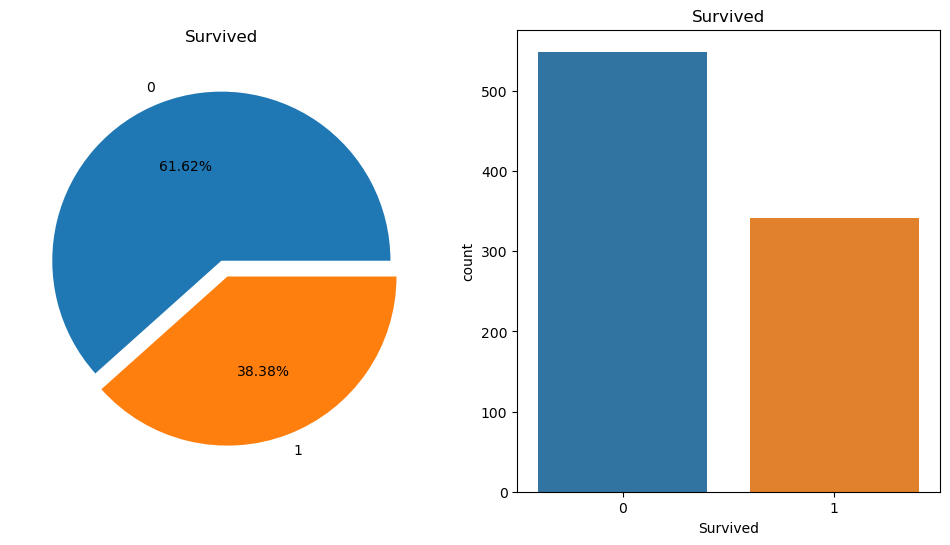

In [25]:
# 38.38% survived
f, ax = plt.subplots(1,2, figsize = (12,6))
data['Survived'].value_counts().plot.pie(explode = [0,0.1], autopct = '%1.2f%%', ax = ax[0])
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot(data = data, x = 'Survived', ax = ax[1])
ax[1].set_title('Survived')
plt.show()

Convert string values of Categorical variables in to numeric values
* sex, embarked

In [26]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [27]:
# male = 1, female = 0
tmp = []
for each in data['Sex']:
    if each == 'female':
        tmp.append(0)
    elif each == 'male':
        tmp.append(1)
    else:
        tmp.append(np.nan)
data['Sex'] = tmp

In [28]:
# 'S' = 0, 'C' = 1, 'Q' = 2, nan 
tmp = []
for each in data['Embarked']:
    if each == 'S':
        tmp.append(0)
    elif each == 'C':
        tmp.append(1)
    elif each == 'Q':
        tmp.append(2)
    else:
        tmp.append(np.nan)
data['Embarked'] = tmp

In [29]:
data.corr()

C:\Users\Playdata\AppData\Local\Temp\ipykernel_6596\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.036847,-0.057527,-0.001652,0.012658,-0.030555
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,0.108669
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,0.043835
Sex,0.042939,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333,-0.118593
Age,0.036847,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067,0.012186
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651,-0.060606
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225,-0.079320
Fare,0.012658,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000,0.063462
Embarked,-0.030555,0.108669,0.043835,-0.118593,0.012186,-0.060606,-0.079320,0.063462,1.000000


C:\Users\Playdata\AppData\Local\Temp\ipykernel_6596\7381881.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), linewidths=0.01, square=True, annot=True, cmap=plt.cm.viridis, linecolor='white')


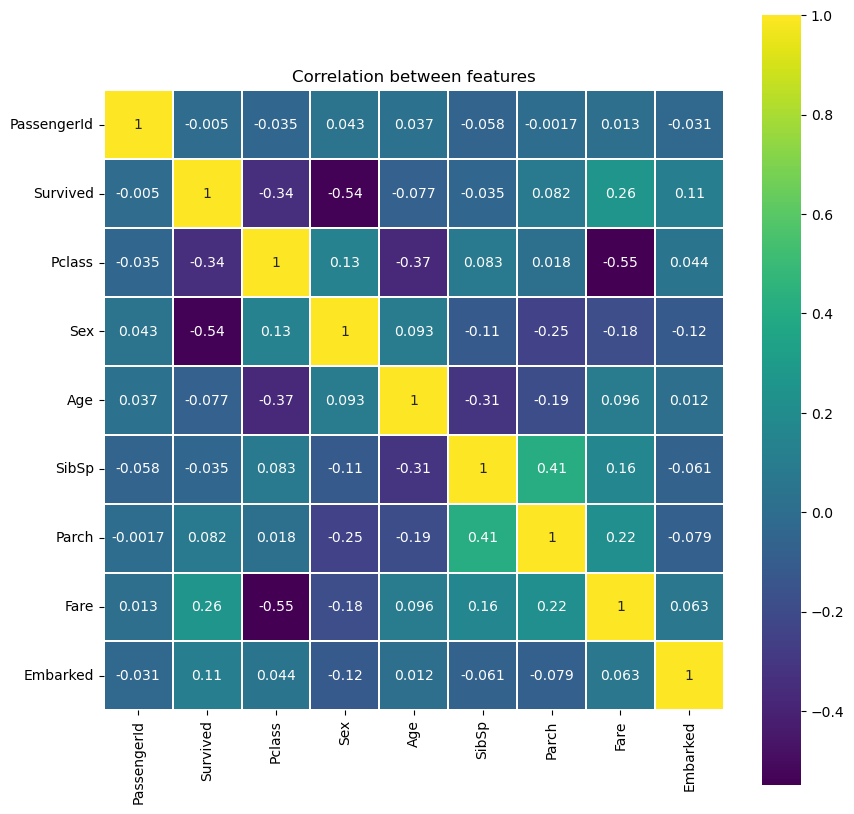

In [30]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), linewidths=0.01, square=True, annot=True, cmap=plt.cm.viridis, linecolor='white')
plt.title('Correlation between features')
plt.show()

variables that has correlation score more than 0.2 : Fare, Sex, Pclass

In [31]:
data['age_group'] = pd.cut(data['Age'], bins = [0,3,7,15,30,60,100],
                             include_lowest = True,
                             labels = ['baby', 'children', 'teenage', 'youngadult', 'adult', 'old'])

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0.0,youngadult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1.0,adult
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,youngadult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0.0,adult
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0.0,adult


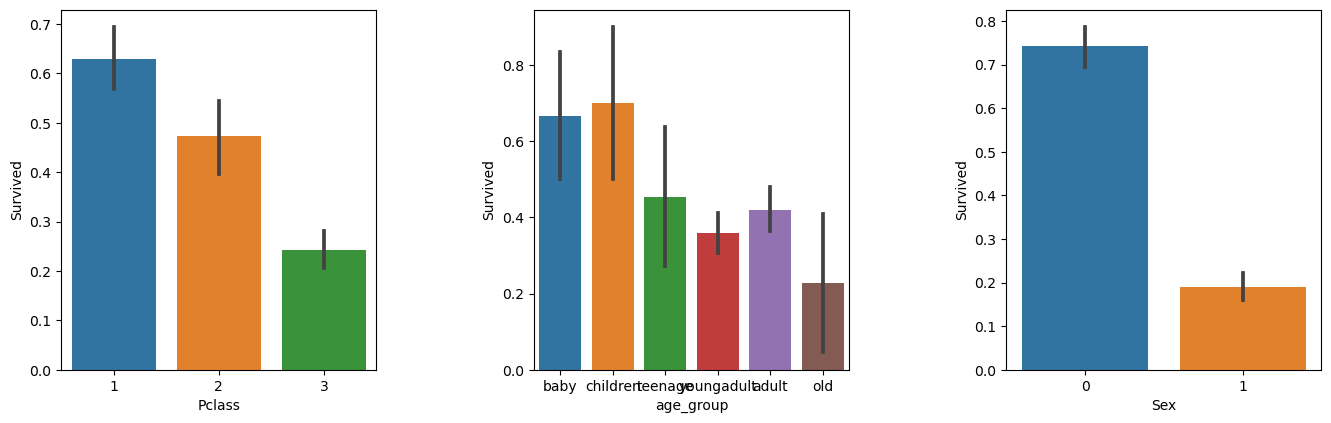

In [32]:
plt.figure(figsize=(14,4))
plt.subplot(131)
sns.barplot(data = data, x = 'Pclass', y = 'Survived')

plt.subplot(132)
sns.barplot(data = data, x = 'age_group', y = 'Survived')

plt.subplot(133)
sns.barplot(data = data, x = 'Sex', y = 'Survived')

plt.subplots_adjust(top = 1, bottom = 0.1, left = 0.1, right = 1, hspace = 0.5, wspace = 0.5)
plt.show()

In [35]:
# 정보가 없는 NaN을 빼고 다시 저장 - 데이터가 714개로 줄어든다
data = data[data['age_group'].notnull()]

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  714 non-null    int64   
 1   Survived     714 non-null    int64   
 2   Pclass       714 non-null    int64   
 3   Name         714 non-null    object  
 4   Sex          714 non-null    int64   
 5   Age          714 non-null    float64 
 6   SibSp        714 non-null    int64   
 7   Parch        714 non-null    int64   
 8   Ticket       714 non-null    object  
 9   Fare         714 non-null    float64 
 10  Cabin        185 non-null    object  
 11  Embarked     712 non-null    float64 
 12  age_group    714 non-null    category
dtypes: category(1), float64(3), int64(6), object(3)
memory usage: 73.4+ KB


In [45]:
# drop variables that are not releance to the predicion
df = data[['Age', 'Pclass', 'Sex', 'Fare']]
df.head()

,Age,Pclass,Sex,Fare
0,22.0,3,1,7.2500
1,38.0,1,0,71.2833
2,26.0,3,0,7.9250
3,35.0,1,0,53.1000
4,35.0,3,1,8.0500


(1) Decision Tree

In [46]:
# train set : 80%, test set : 20%
X_train, X_test, y_train, y_test = train_test_split(df, data[['Survived']], test_size = 0.2, random_state = 42)

In [47]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [48]:
print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

0.9912434325744308
0.7062937062937062


==> over-fitting

In [49]:
splitter = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)
scores = cross_validate(dt, X_train, y_train, cv = splitter)
print(np.mean(scores['test_score']))

0.7653962492437991


In [50]:
params = {'min_impurity_decrease' : np.arange(0.0001, 0.001, 0.0001),
          'max_depth' : range(5,20,1),
          'min_samples_split' : range(2,100,10)}

In [51]:
gs = GridSearchCV(DecisionTreeClassifier(random_state = 42), params, n_jobs = -1)
gs.fit(X_train, y_train)

print("최상의 매개변수 조합 : ", gs.best_params_)
print("최상의 교차검증 점수 : ", np.max(gs.cv_results_['mean_test_score']))

최상의 매개변수 조합 :  {'max_depth': 5, 'min_impurity_decrease': 0.0001, 'min_samples_split': 2}
최상의 교차검증 점수 :  0.8196643783371471


In [52]:
dt = gs.best_estimator_

print(dt.score(X_train, y_train))

0.8651488616462347


In [53]:
print(dt.score(X_test, y_test))

0.7202797202797203


import test.csv

In [152]:
test = pd.read_csv('../data/titanic/test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [153]:
# male = 1, female = 0
tmp = []
for each in test['Sex']:
    if each == 'female':
        tmp.append(0)
    elif each == 'male':
        tmp.append(1)
    else:
        tmp.append(np.nan)
test['Sex'] = tmp
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S


In [154]:
test_df = test[['Age', 'Pclass', 'Sex', 'Fare']]
test_df.head()

,Age,Pclass,Sex,Fare
0,34.5,3,1,7.8292
1,47.0,3,0,7.0000
2,62.0,2,1,9.6875
3,27.0,3,1,8.6625
4,22.0,3,0,12.2875


In [155]:
test_df.info()
# Age(86) & Fare(1) includes null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     332 non-null    float64
 1   Pclass  418 non-null    int64  
 2   Sex     418 non-null    int64  
 3   Fare    417 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 13.2 KB


In [157]:
mean_value_a = test_df['Age'].mean()
mean_value_f = test_df['Fare'].mean()

In [158]:
#gfg['G2'].fillna(value=mean_value, inplace=True)
test_df['Age'].fillna(value=mean_value_a, inplace = True)
test_df['Fare'].fillna(value=mean_value_f, inplace = True)


test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     418 non-null    float64
 1   Pclass  418 non-null    int64  
 2   Sex     418 non-null    int64  
 3   Fare    418 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 13.2 KB


C:\Users\Playdata\AppData\Local\Temp\ipykernel_6596\3970315831.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Age'].fillna(value=mean_value_a, inplace = True)
C:\Users\Playdata\AppData\Local\Temp\ipykernel_6596\3970315831.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Fare'].fillna(value=mean_value_f, inplace = True)


In [159]:
prediction = dt.predict(test_df)

In [166]:
submission = pd.DataFrame({'PassengerId': test['PassengerId'], 
                           'Survived': dt.predict(test_df)})

In [169]:
submission.to_csv('../data/titanic_submission.csv', index=False)

필요 없었으

In [94]:
test_df['pred'] = prediction

In [97]:
test_df.tail()

,Age,Pclass,Sex,Fare,pred
409,3.0,3,0,13.775,1
411,37.0,1,0,90.000,1
412,28.0,3,0,7.775,0
414,39.0,1,0,108.900,1
415,38.5,3,1,7.250,0


In [77]:
test_df.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            403, 404, 405, 406, 407, 409, 411, 412, 414, 415],
           dtype='int64', length=331)

In [107]:
test_df['Index'] = test_df.index
test['Index'] = test.index

In [108]:
test.set_index(['Index', 'Pclass', 'Sex', 'Age', 'Fare'], inplace=True)
test_df.set_index(['Index', 'Pclass', 'Sex', 'Age', 'Fare'], inplace=True)


In [110]:
merged = test.join(test_df).reset_index()
merged.tail()

,Index,Pclass,Sex,Age,Fare,PassengerId,Name,SibSp,Parch,Ticket,Cabin,Embarked,pred
413,413,3,1,NaN,8.0500,1305,"Spector, Mr. Woolf",0,0,A.5. 3236,NaN,S,NaN
414,414,1,0,39.0,108.9000,1306,"Oliva y Ocana, Dona. Fermina",0,0,PC 17758,C105,C,1.0
415,415,3,1,38.5,7.2500,1307,"Saether, Mr. Simon Sivertsen",0,0,SOTON/O.Q. 3101262,NaN,S,0.0
416,416,3,1,NaN,8.0500,1308,"Ware, Mr. Frederick",0,0,359309,NaN,S,NaN
417,417,3,1,NaN,22.3583,1309,"Peter, Master. Michael J",1,1,2668,NaN,C,NaN


In [112]:
merged.to_csv('../data/titanic_prediction.csv')